In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [2]:
import os
os.chdir('../')
from function import make_data

In [3]:
df_2 = pd.read_csv('./pn500.csv')

In [4]:
dx = np.diff(df_2['V2'], axis=0)

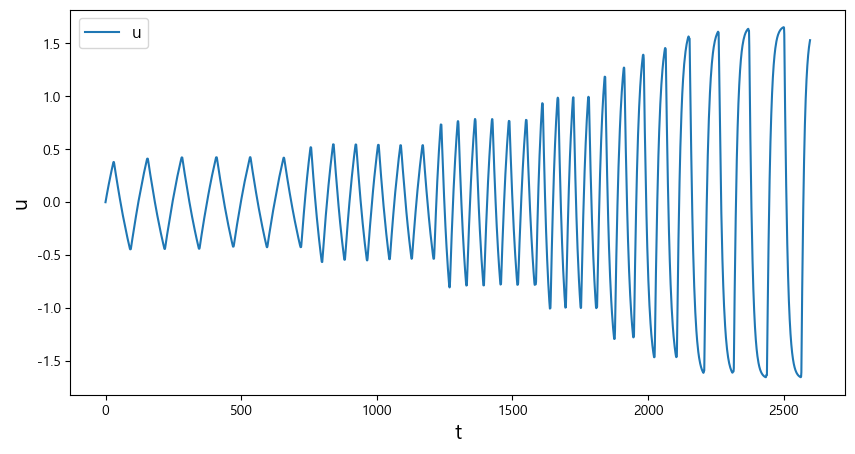

In [5]:
plt.figure(figsize = (10, 5))
plt.plot(df_2['V2'], label = 'u')
plt.ylabel('u', fontsize = 15)
plt.xlabel('t', fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

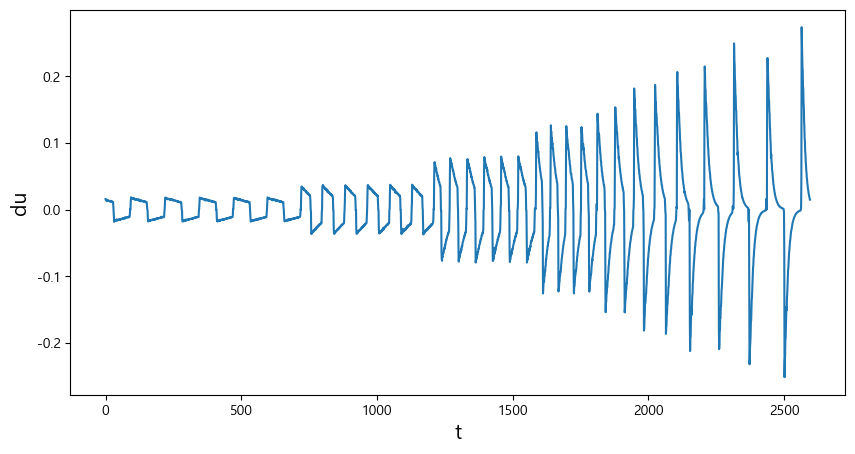

In [6]:
plt.figure(figsize = (10, 5))
plt.plot(dx)
plt.ylabel('du', fontsize = 15)
plt.xlabel('t', fontsize = 15)
plt.show()

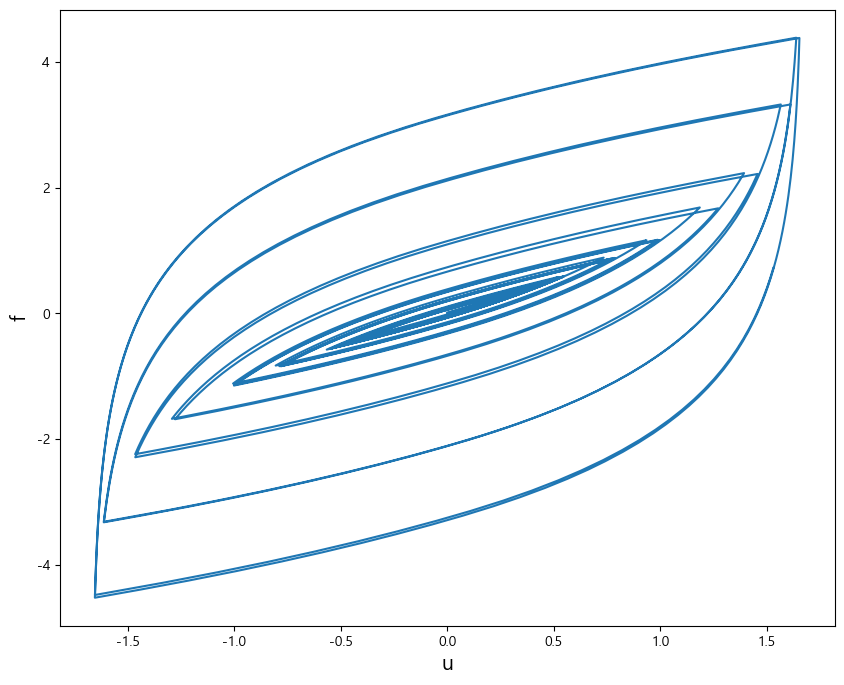

In [7]:
plt.figure(figsize = (10,8))
plt.plot(df_2['V2'], df_2['V1'])
plt.xlabel('u', fontsize = 15)
plt.ylabel('f', fontsize = 15)
plt.show()

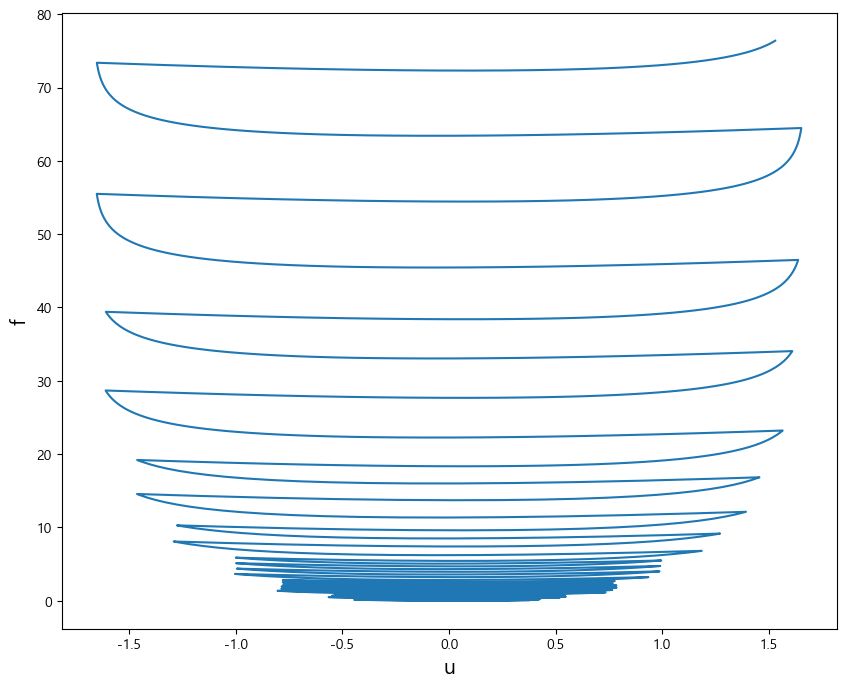

In [8]:
plt.figure(figsize = (10,8))
plt.plot(df_2['V2'], df_2['V3'])
plt.xlabel('u', fontsize = 15)
plt.ylabel('f', fontsize = 15)
plt.show()

In [9]:
def eval_inc(z, dx, gamma, beta, alpha, n):
    psi = gamma + beta * np.sign(dx * z)
    dz = dx * (1-abs(z)**n * psi)
    df = (1-alpha) * dx + alpha * dz
    de = z * dx

    return dz, df, de

In [10]:
result_matrix = np.zeros((len(df_2), 4)) # z, x, f, e

In [11]:
for i in range(len(result_matrix)-1):
    res = eval_inc(result_matrix[i,1], dx[i], 0.1, 0.5, 0.001, 1)

    result_matrix[i+1,0] = result_matrix[i,0] + dx[i] # x
    result_matrix[i+1,1] = result_matrix[i,1] + res[0] # z
    result_matrix[i+1,2] = result_matrix[i,2] + res[1] # f
    result_matrix[i+1,3] = result_matrix[i,3] + res[2] # e


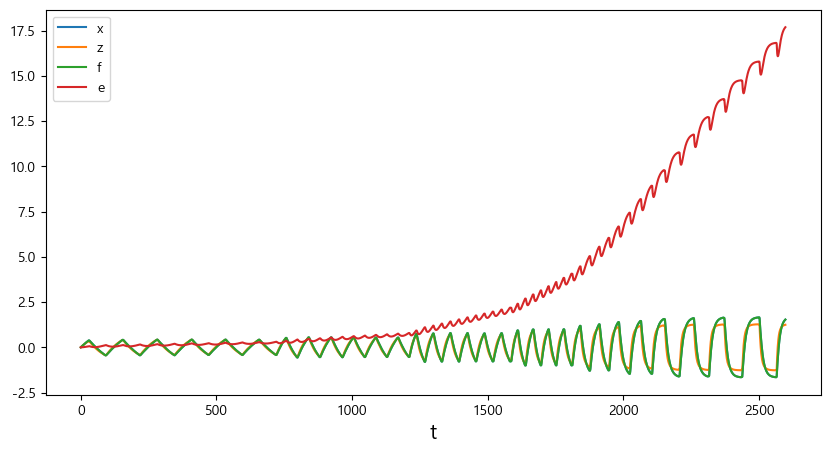

In [12]:
plt.figure(figsize = (10, 5))
plt.plot(result_matrix[:,0], label = 'x')
plt.plot(result_matrix[:,1], label = 'z')
plt.plot(result_matrix[:,2], label = 'f')
plt.plot(result_matrix[:,3], label = 'e')
plt.legend()
plt.xlabel('t', fontsize = 15)
plt.show()

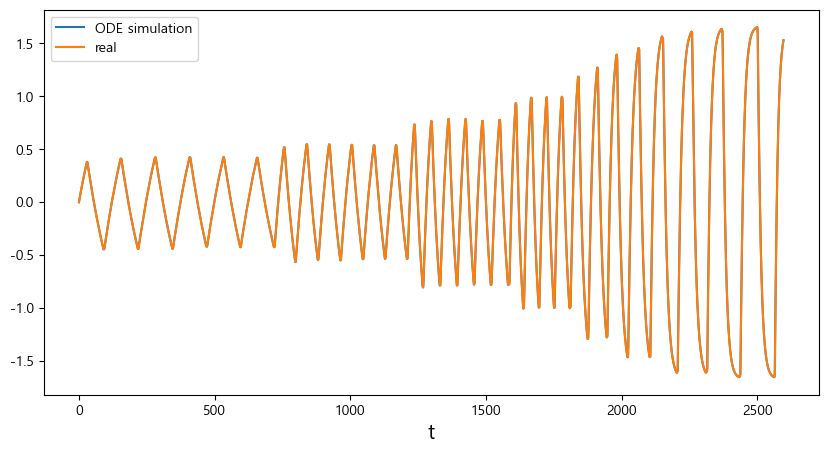

In [13]:
plt.figure(figsize = (10, 5))
plt.plot(result_matrix[:,2], label = 'ODE simulation')
df_2.iloc[:,2].plot(label = 'real')
plt.legend()
plt.xlabel('t', fontsize = 15)
plt.show()

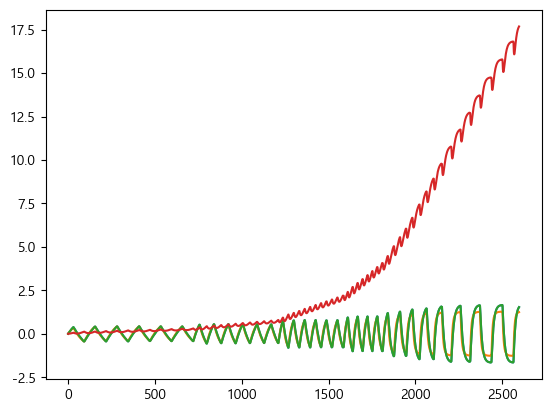

In [14]:
plt.plot(result_matrix[:,])

-----

In [15]:
df = make_data(dt = 1, total_time = 10000)

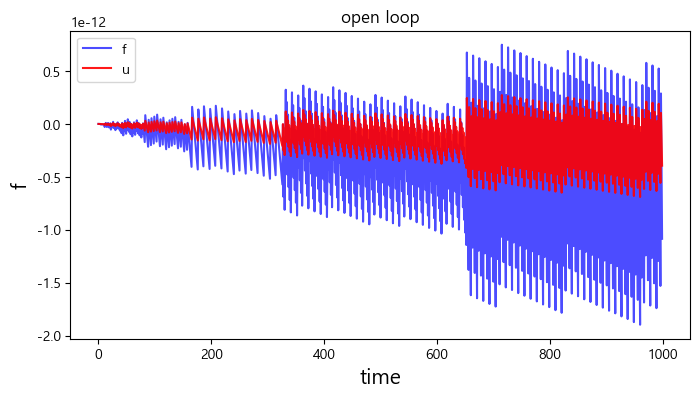

In [153]:
plt.figure(figsize=(8,4))
plt.title('open loop')
plt.plot(df.f[:1000], label = 'f', color = 'blue', alpha = 0.7)
plt.plot(df.u[:1000], label = 'u', color = 'red', alpha = 0.9)

plt.ylabel('f', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.legend()
plt.show()

In [17]:
df.f

0        0.000000e+00
1       -5.551115e-17
2       -1.665335e-16
3       -3.330669e-16
4       -4.496403e-15
             ...     
9996    -9.936274e-12
9997     1.885270e-12
9998    -6.306122e-12
9999    -1.449346e-11
10000   -2.671918e-12
Name: f, Length: 10001, dtype: float64

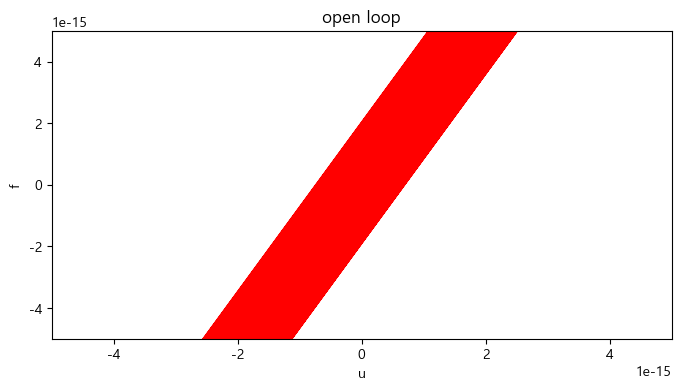

In [18]:
plt.figure(figsize=(8,4))
plt.title('open loop')
plt.plot(df.u, df.f, color = 'red')
plt.ylim(-0.5*1e-14, 0.5*1e-14)
plt.xlim(-0.5*1e-14, 0.5*1e-14)
plt.ylabel('f')
plt.xlabel('u')
plt.show()

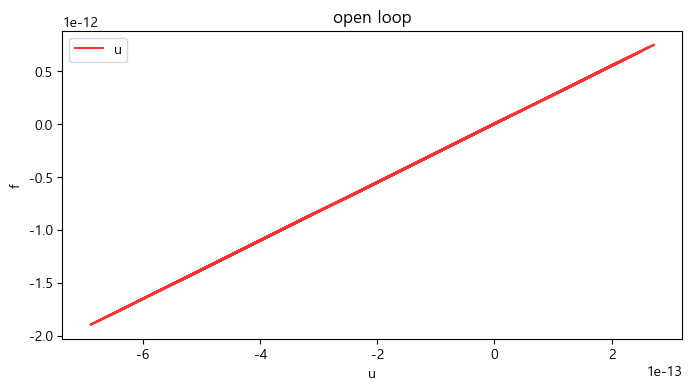

In [19]:
plt.figure(figsize=(8,4))
plt.title('open loop')
plt.plot(df.u[:1000], df.f[:1000], alpha = 0.8, label = 'u', color = 'red')
plt.ylabel('f')
plt.xlabel('u')
plt.legend()
plt.show()

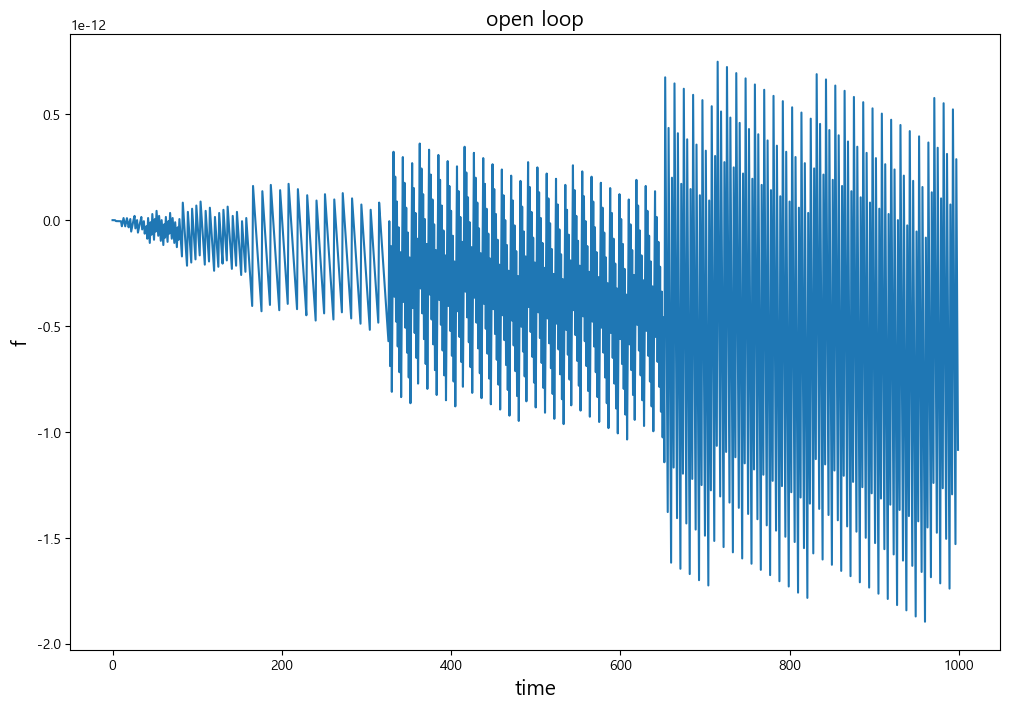

In [20]:
plt.figure(figsize=(12,8))
plt.title('open loop', fontsize = 15)
plt.plot(df.f[:1000])
plt.ylabel('f', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()

In [21]:
train_df = df[:6000]
test_df = df[6000:]

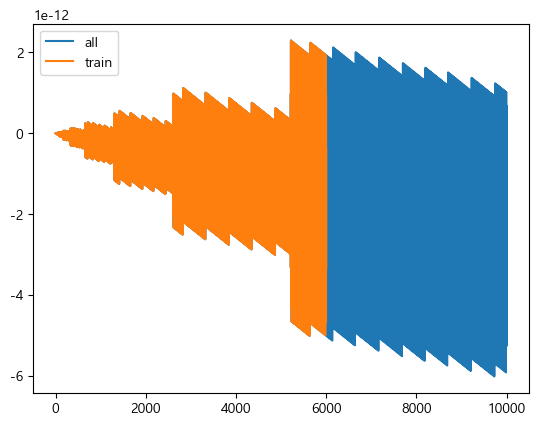

In [22]:
plt.plot(df.u)
plt.plot(train_df.u)
plt.legend(['all', 'train'])

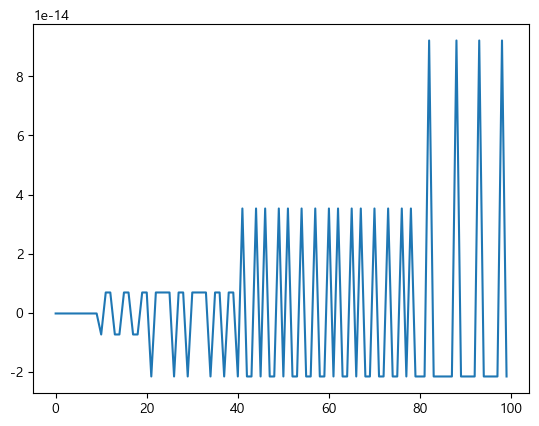

In [23]:
plt.plot(np.diff(df.u, axis=0)[:100])

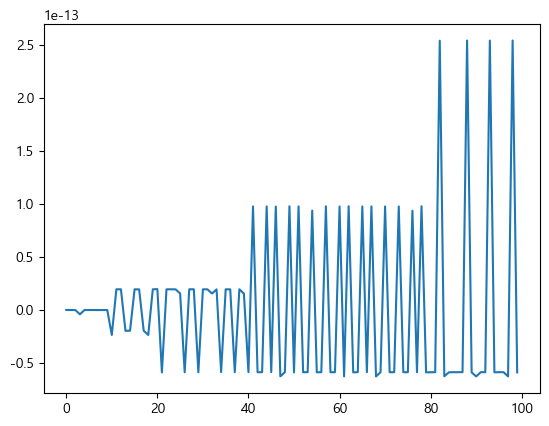

In [24]:
plt.plot(np.diff(df.f, axis=0)[:100])

In [25]:
d_x = np.diff(df.u, axis=0)

In [26]:
train_dx = d_x[:6000]
test_dx = d_x[6000:]

In [27]:
from pyswarm import pso

In [28]:
def objective_function(params, dx, target_df):
    gamma, beta, alpha, n, z = params
    df_list = []
    for i in range(len(target_df)):
        _, df, _ = eval_inc(z, dx, gamma, beta, alpha, n)
        df_list.append(df)
    total_error = np.sum(np.abs(np.array(df_list) - np.array(target_df)))
    return total_error

In [29]:
lb = [-10, -10, -10, -10, -10] 
ub = [10, 10, 10, 10, 10]

args = (train_dx, np.append(np.diff(train_df['f'], axis=0),0))

In [30]:
optimized_params, _ = pso(objective_function, lb, ub, maxiter=50, args = args, debug = True, minstep=1e-7)

No constraints given.


C:\Users\user\AppData\Local\Temp\ipykernel_1724\3115354175.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  dz = dx * (1-abs(z)**n * psi)


Best after iteration 1: [-3.67392095  5.25062994  6.57842595  2.3467376 ] 7.344743558322795e-05
Best after iteration 2: [-3.67392095  5.25062994  6.57842595  2.3467376 ] 7.344743558322795e-05
Best after iteration 3: [-3.67392095  5.25062994  6.57842595  2.3467376 ] 7.344743558322795e-05
Best after iteration 4: [-3.67392095  5.25062994  6.57842595  2.3467376 ] 7.344743558322795e-05
Best after iteration 5: [-3.67392095  5.25062994  6.57842595  2.3467376 ] 7.344743558322795e-05
Best after iteration 6: [-3.67392095  5.25062994  6.57842595  2.3467376 ] 7.344743558322795e-05
Best after iteration 7: [-3.67392095  5.25062994  6.57842595  2.3467376 ] 7.344743558322795e-05
Best after iteration 8: [-3.67392095  5.25062994  6.57842595  2.3467376 ] 7.344743558322795e-05
Best after iteration 9: [-3.67392095  5.25062994  6.57842595  2.3467376 ] 7.344743558322795e-05
Best after iteration 10: [-3.67392095  5.25062994  6.57842595  2.3467376 ] 7.344743558322795e-05
Best after iteration 11: [-3.67392095  

In [31]:
optimized_params

array([-3.67392095,  5.25062994,  6.57842595,  2.3467376 ])

In [189]:
gamma, beta, alpha, n, z = optimized_params

In [190]:
result_matrix_2 = np.zeros((len(df), 4)) # z, x, f, e

In [191]:
for i in range(len(result_matrix_2)-1):
    res = eval_inc(z, d_x[i], gamma, beta, alpha, 1)

    result_matrix_2[i+1,0] = result_matrix_2[i,0] + d_x[i] # x
    result_matrix_2[i+1,1] = result_matrix_2[i,1] + res[0] # z
    result_matrix_2[i+1,2] = result_matrix_2[i,2] + res[1] # f
    result_matrix_2[i+1,3] = result_matrix_2[i,3] + res[2] # e


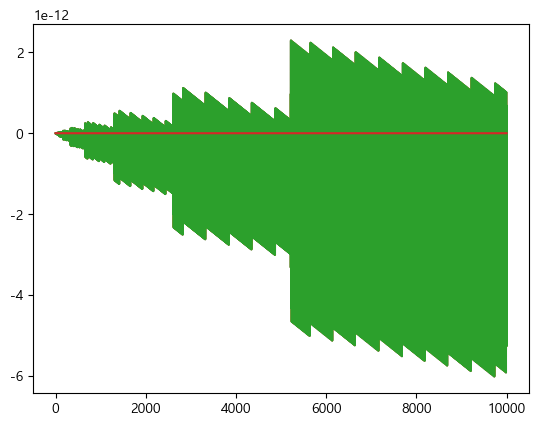

In [192]:
plt.plot(result_matrix_2)

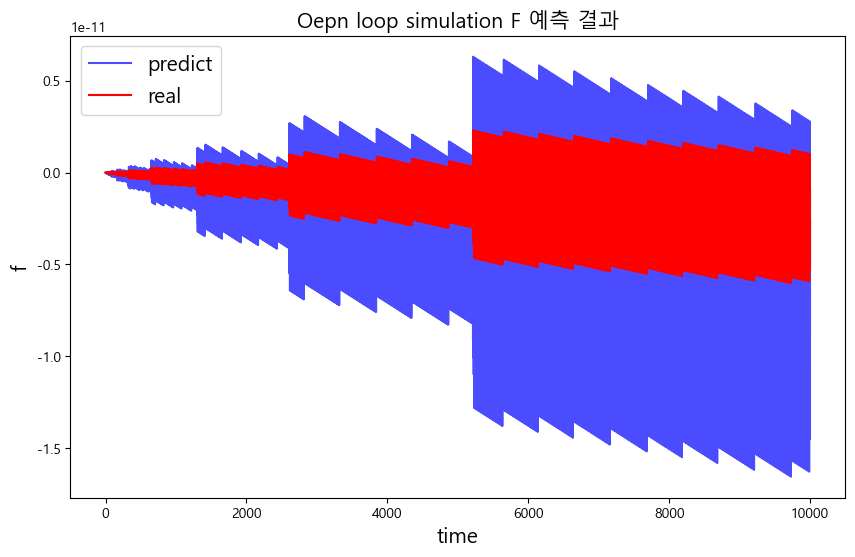

In [193]:
plt.figure(figsize=(10,6))
plt.plot(range(len(df)), df.f, color = 'blue', alpha = 0.7)
plt.plot(range(len(df)),result_matrix_2[:,2], color = 'red', alpha = 1)
plt.title('Oepn loop simulation F 예측 결과', fontsize = 15)
plt.legend(['predict', 'real'], fontsize = 15)
plt.ylabel('f', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()

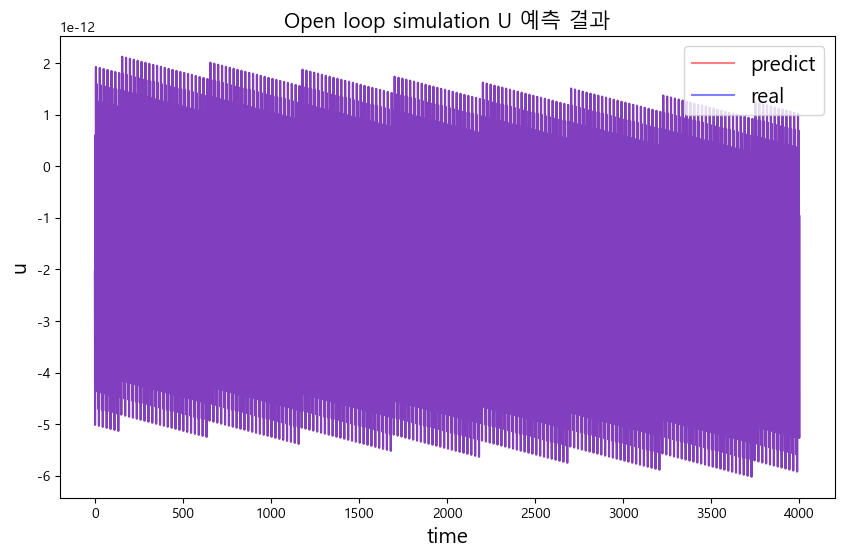

In [184]:
plt.figure(figsize = (10, 6))
plt.title('Open loop simulation U 예측 결과', fontsize = 15)
plt.plot(range(4001),result_matrix_2[:,0][len(train_df):], alpha = 0.5, color = 'red')
plt.plot(range(4001), df.u[len(train_df):], alpha = 0.5, color = 'blue')
plt.legend(['predict', 'real'], fontsize = 15)
plt.ylabel('u', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()

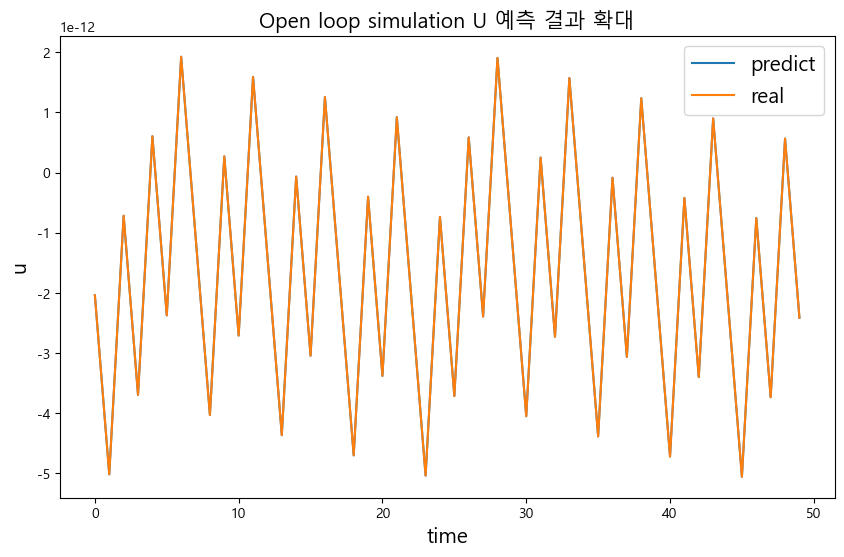

In [185]:
plt.figure(figsize = (10, 6))
plt.title('Open loop simulation U 예측 결과 확대', fontsize = 15)
plt.plot(range(50),result_matrix_2[:,0][len(train_df):len(train_df)+50])
plt.plot(range(50), df.u[len(train_df):len(train_df)+50])
plt.legend(['predict', 'real'], fontsize= 15)
plt.ylabel('u', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()

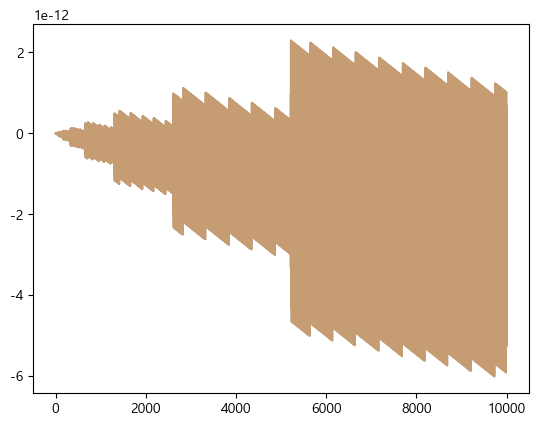

In [186]:
plt.plot(result_matrix_2[:,0], label = 'z', alpha = 0.5)
plt.plot(result_matrix_2[:,1], label = 'u', alpha = 0.5)

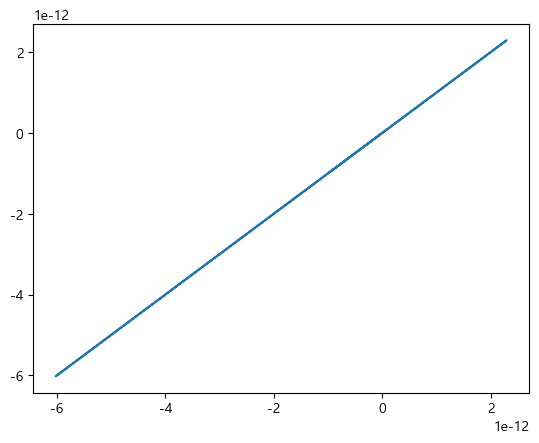

In [187]:
plt.plot(result_matrix_2[:,0], result_matrix_2[:,1])

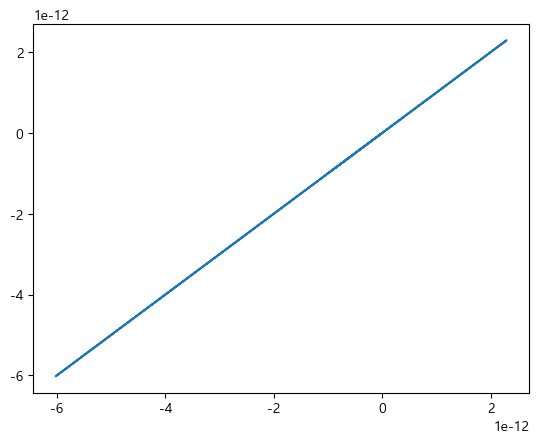

In [188]:
plt.plot(result_matrix_2[:,2], result_matrix_2[:,1])

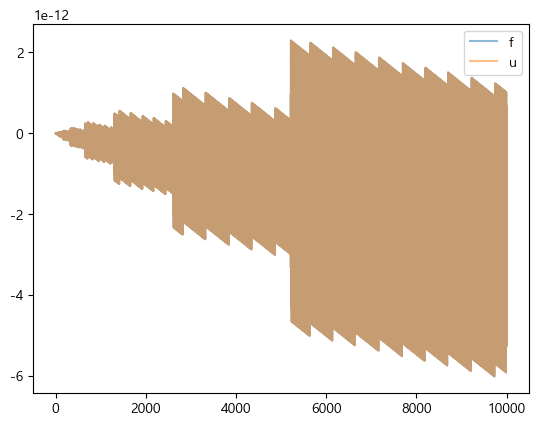

In [163]:
plt.plot(result_matrix_2[:,2], label = 'f', alpha = 0.5)
plt.plot(result_matrix_2[:,1], label = 'u', alpha = 0.5)
plt.legend()
plt.show()


In [41]:
import tensorflow as tf
from tensorflow.keras import layers

In [42]:
pred_u_model = tf.keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])


In [43]:
pred_u_model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
mn = MinMaxScaler()

In [73]:
traind_mn = mn.fit_transform(train_df.u.values.reshape(-1,1))
testd_mn = mn.transform(test_df.u.values.reshape(-1,1))

train_f_mn = mn.fit_transform(train_df.f.values.reshape(-1,1))
test_f_mn = mn.transform(test_df.f.values.reshape(-1,1))

In [74]:
pred_u_model.fit(traind_mn, train_f_mn, epochs=100, verbose=1)

Epoch 1/100
  1/188 [..............................] - ETA: 0s - loss: 0.3835 - mae: 0.5867 - mse: 0.3835

188/188 [==============================] - 0s 670us/step - loss: 0.0100 - mae: 0.0417 - mse: 0.0100
Epoch 2/100
188/188 [==============================] - 0s 620us/step - loss: 7.5214e-05 - mae: 0.0026 - mse: 7.5214e-05
Epoch 3/100
188/188 [==============================] - 0s 615us/step - loss: 3.6968e-05 - mae: 0.0023 - mse: 3.6968e-05
Epoch 4/100
188/188 [==============================] - 0s 615us/step - loss: 2.6298e-06 - mae: 5.2874e-04 - mse: 2.6298e-06
Epoch 5/100
188/188 [==============================] - 0s 610us/step - loss: 9.6142e-07 - mae: 2.9924e-04 - mse: 9.6142e-07
Epoch 6/100
188/188 [==============================] - 0s 619us/step - loss: 6.5450e-07 - mae: 2.7159e-04 - mse: 6.5450e-07
Epoch 7/100
188/188 [==============================] - 0s 626us/step - loss: 4.6898e-07 - mae: 2.5284e-04 - mse: 4.6898e-07
Epoch 8/100
188/188 [==============================] - 0s 679us/step - loss: 3.8176e-07 - mae: 2.2590e-04 - mse: 3.8176e-07
Epoch 9/100
188/188 [===================

In [75]:
pred_f = pred_u_model.predict(testd_mn)

126/126 [==============================] - 0s 512us/step


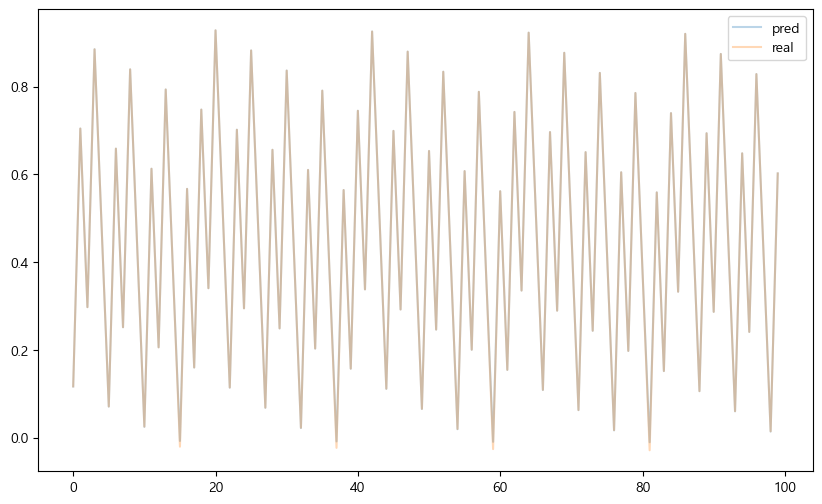

In [93]:
plt.figure(figsize = (10,6))
plt.plot(pred_f[900:1000], alpha = 0.3, label = 'pred')
plt.plot(test_f_mn[900:1000], alpha = 0.3, label = 'real')
plt.legend()
plt.show()

---------
-----------


In [47]:
close_df = make_data(dt = 0.01, total_time = 100)

In [48]:
close_df

,u,time,f
0,0.000000e+00,0.00,0.000000
1,6.279052e-02,0.01,0.152729
2,1.253332e-01,0.02,0.272857
3,1.873813e-01,0.03,0.369560
4,2.486899e-01,0.04,0.449713
...,...,...,...
9996,-2.486899e-01,99.96,0.299485
9997,-1.873813e-01,99.97,0.338637
9998,-1.253332e-01,99.98,0.375329
9999,-6.279052e-02,99.99,0.410222


In [49]:
close_df_train = close_df[:6000]
close_df_test = close_df[6000:]

In [50]:
close_dx = np.diff(close_df.u, axis=0)

In [51]:
train_close_dx = close_dx[:6000]
test_close_dx = close_dx[6000:]

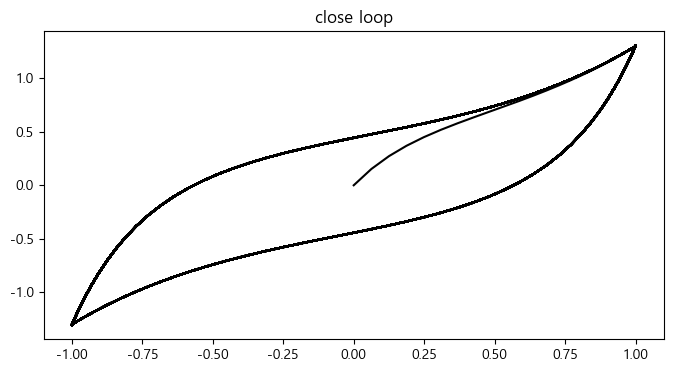

In [127]:
plt.figure(figsize=(8,4))
plt.title('close loop')
plt.plot(close_df.u, close_df.f, color = 'k')
plt.show()

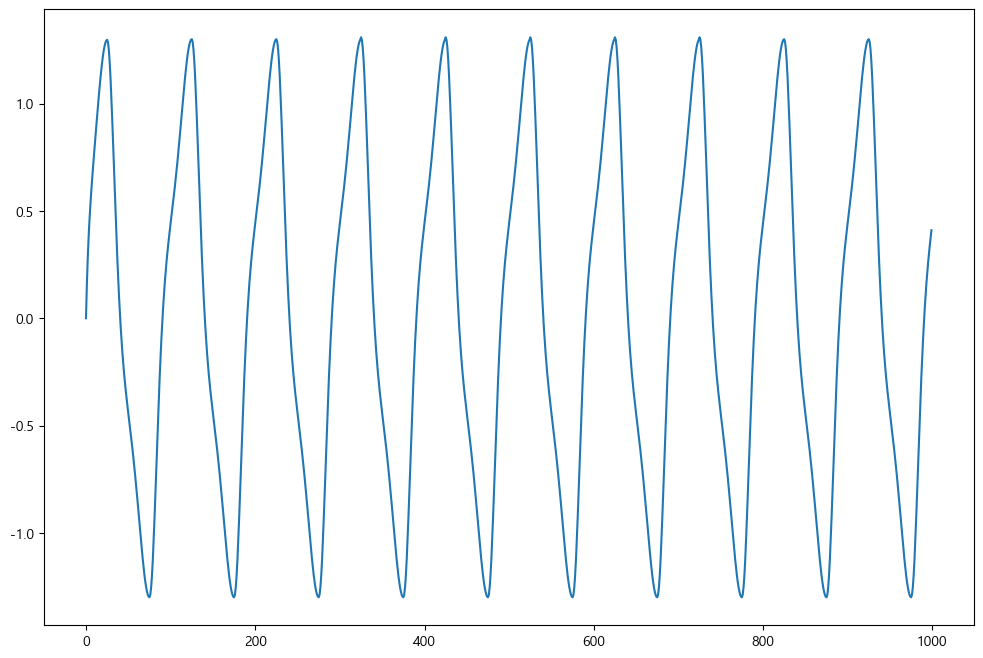

In [53]:
plt.figure(figsize=(12,8))
plt.plot(close_df.f[:1000])

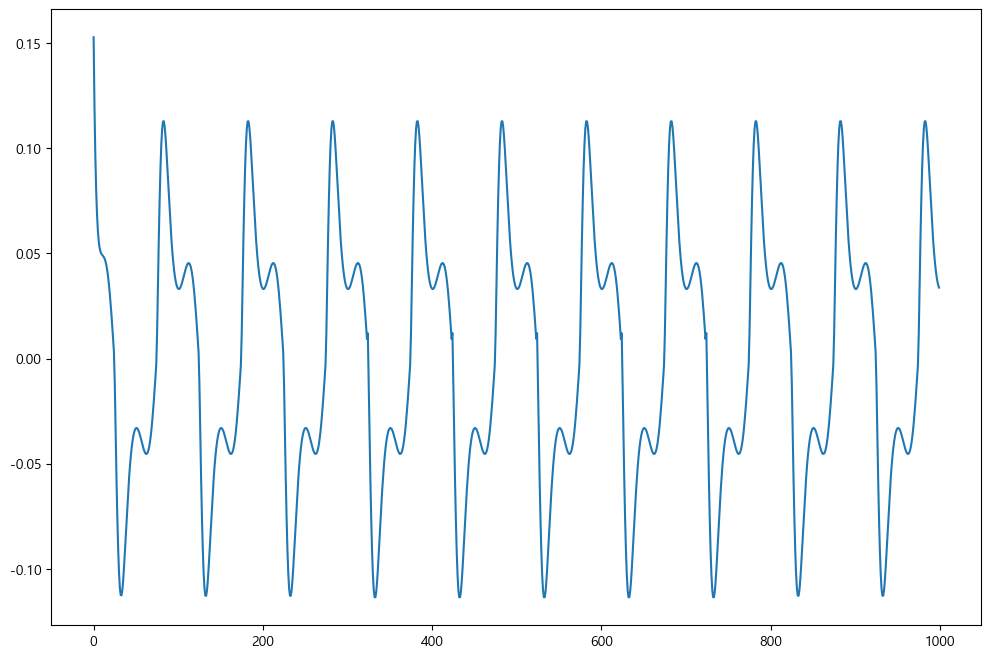

In [54]:
plt.figure(figsize=(12,8))
plt.plot(np.diff(close_df['f'], axis=0)[:1000])

In [107]:
target_df = np.append(np.diff(close_df_train['f'], axis=0),0)

In [113]:
len(eval_inc(0, train_close_dx, 0.1, 0.5, 0.001, 1)[1])

6000

In [108]:
args_2 = (train_close_dx, target_df)

In [57]:
def objective_function_2(params, dx, target_df):
    gamma, beta, alpha, z, n = params
    df_list = []
    for i in range(len(target_df)):
        _, df, _ = eval_inc(z, dx, gamma, beta, alpha, n)
        df_list.append(df)
    total_error = np.sum(np.abs(np.array(df_list) - np.array(target_df)))
    return total_error

In [58]:
lb_2 = [-10, -10, -10, -10, -10]
ub_2 = [10, 10, 10, 10, 10]

In [59]:
optimized_params_2, _ = pso(objective_function_2, lb_2, ub_2, maxiter=100, args = args_2, debug=True, swarmsize=10, phip = 0.7, phig = 0.7, minstep=1e-10)

No constraints given.
New best for swarm at iteration 1: [ -4.11393303   0.80348904 -10.           7.83555868  -3.24277562] 959548.0484364864
Best after iteration 1: [ -4.11393303   0.80348904 -10.           7.83555868  -3.24277562] 959548.0484364864
New best for swarm at iteration 2: [-8.75785566  0.87090089 -6.75719888  8.08103689 -3.04352257] 955237.5568126881
Best after iteration 2: [-8.75785566  0.87090089 -6.75719888  8.08103689 -3.04352257] 955237.5568126881
Best after iteration 3: [-8.75785566  0.87090089 -6.75719888  8.08103689 -3.04352257] 955237.5568126881
New best for swarm at iteration 4: [-5.37764549  0.639351   -9.40068479  7.82247766 -2.94639334] 955177.1148138632
Best after iteration 4: [-5.37764549  0.639351   -9.40068479  7.82247766 -2.94639334] 955177.1148138632
Best after iteration 5: [-5.37764549  0.639351   -9.40068479  7.82247766 -2.94639334] 955177.1148138632
Best after iteration 6: [-5.37764549  0.639351   -9.40068479  7.82247766 -2.94639334] 955177.1148138632

In [60]:
optimized_params_2

array([-5.49114678,  0.05121827, -9.51304118,  7.7431191 , -2.97866701])

In [61]:
gamma_close, beta_close, alpha_close, close_z, close_n = optimized_params_2

In [62]:
result_matrix_3 = np.zeros((len(close_df), 4)) # z, x, f, e

In [171]:
for i in range(len(result_matrix_3)-1):
    res = eval_inc(close_z, close_dx[i], gamma_close, beta_close, alpha_close, close_n)

    result_matrix_3[i+1,0] = result_matrix_3[i,0] + close_dx[i] # x
    result_matrix_3[i+1,1] = result_matrix_3[i,1] + res[0] # z
    result_matrix_3[i+1,2] = result_matrix_3[i,2] + res[1] # f
    result_matrix_3[i+1,3] = result_matrix_3[i,3] + res[2] # e

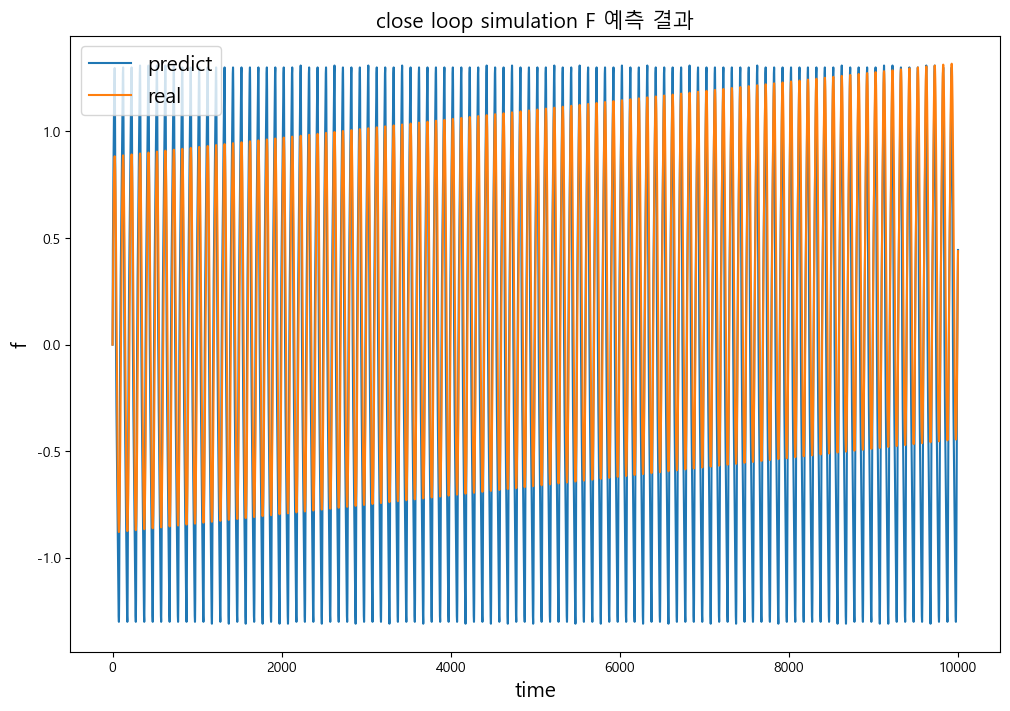

In [209]:
plt.figure(figsize=(12,8))
plt.plot(range(len(df)), close_df.f)
plt.plot(range(len(df)),result_matrix_3[:,2])
plt.title('close loop simulation F 예측 결과', fontsize = 15)
plt.legend(['predict', 'real'], fontsize = 15)
plt.ylabel('f', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()

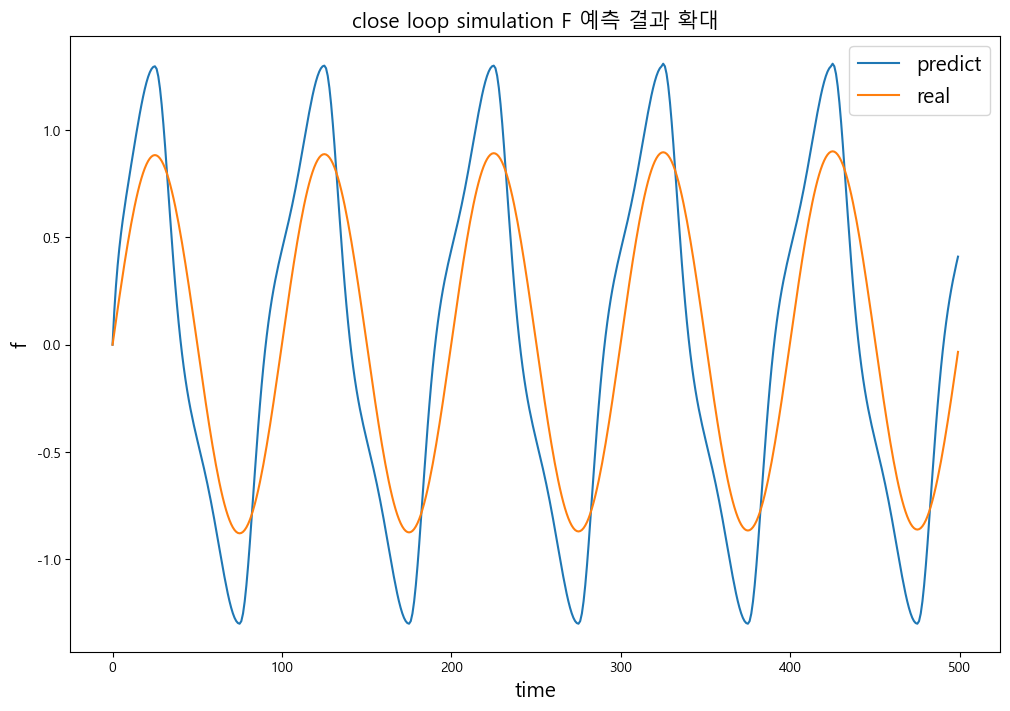

In [211]:
plt.figure(figsize=(12,8))
plt.plot(range(500), close_df.f[:500])
plt.plot(range(500),result_matrix_3[:,2][:500])
plt.title('close loop simulation F 예측 결과 확대', fontsize = 15)
plt.legend(['predict', 'real'], fontsize = 15)
plt.ylabel('f', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()

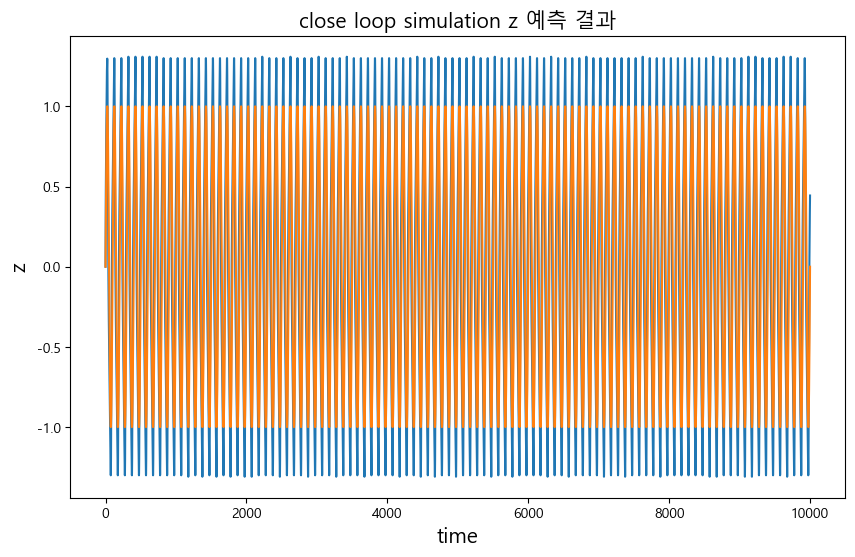

In [217]:
plt.figure(figsize=(10,6))
plt.plot(range(len(df)), close_df.f)

plt.plot(range(len(df)),result_matrix_3[:,0])

plt.title('close loop simulation z 예측 결과', fontsize = 15)
plt.ylabel('z', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()

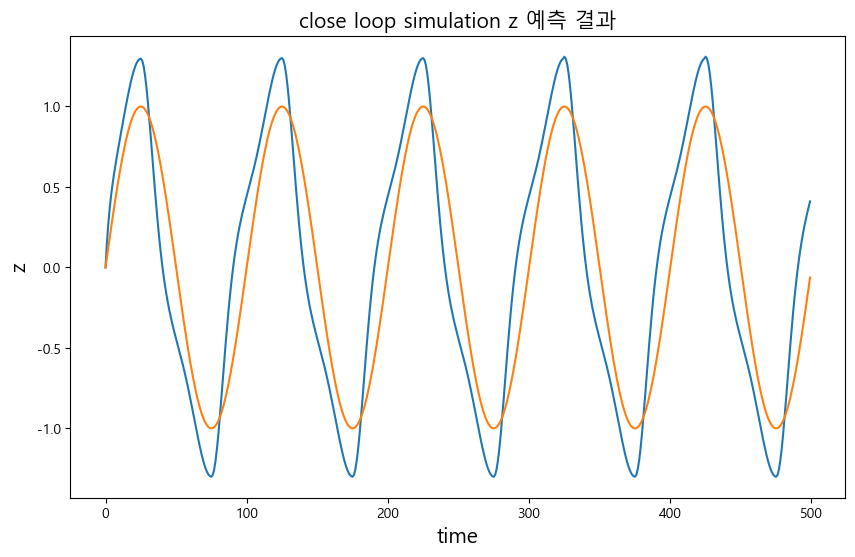

In [233]:
plt.figure(figsize=(10,6))
plt.plot(range(500), close_df.f[:500])

plt.plot(range(500),result_matrix_3[:500,0])

plt.title('close loop simulation z 예측 결과', fontsize = 15)
plt.ylabel('z', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()

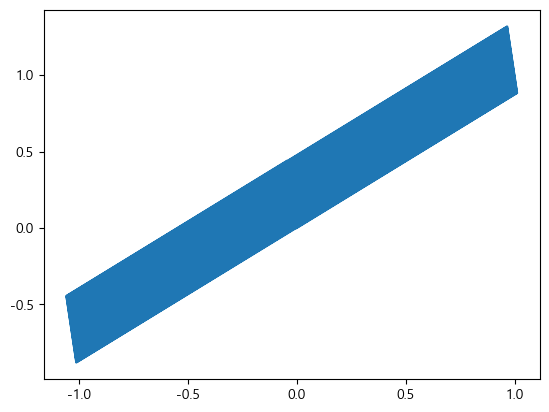

In [235]:
plt.plot(result_matrix_3[:,1], result_matrix_3[:,2])

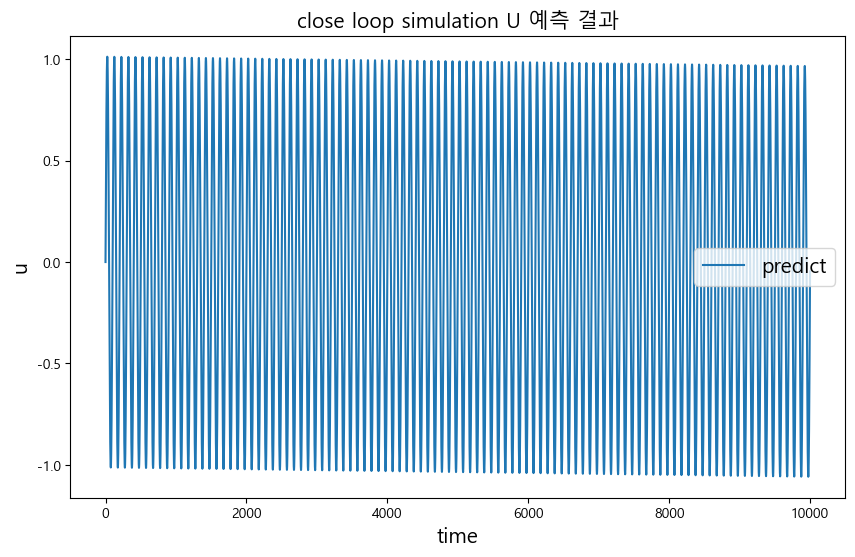

In [196]:
plt.figure(figsize=(10,6))
plt.plot(range(len(df)),result_matrix_3[:,1])
plt.title('close loop simulation U 예측 결과', fontsize = 15)
plt.legend(['predict', 'real'], fontsize = 15)
plt.ylabel('u', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()

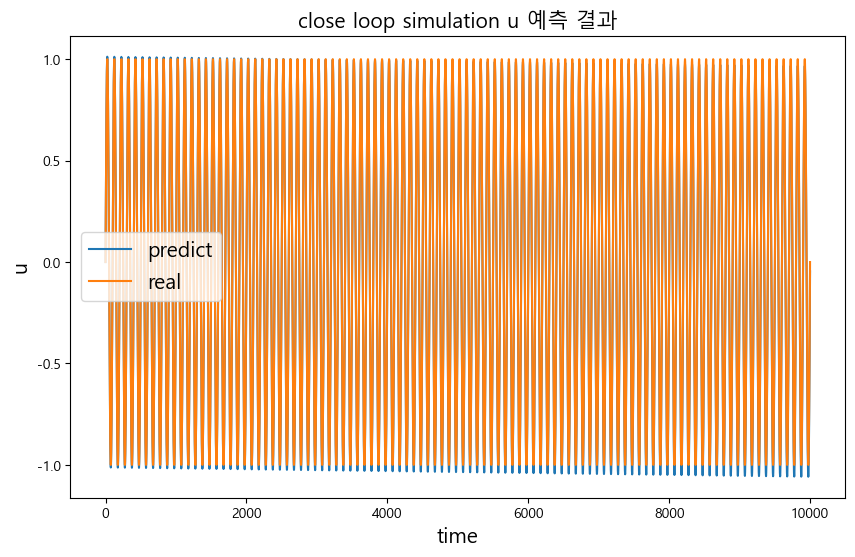

In [177]:
plt.figure(figsize=(10,6))
plt.plot(range(len(df)),result_matrix_3[:,1])
plt.plot(range(len(df)), close_df.u)
plt.title('close loop simulation u 예측 결과', fontsize = 15)
plt.legend(['predict', 'real'], fontsize = 15)
plt.ylabel('u', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()

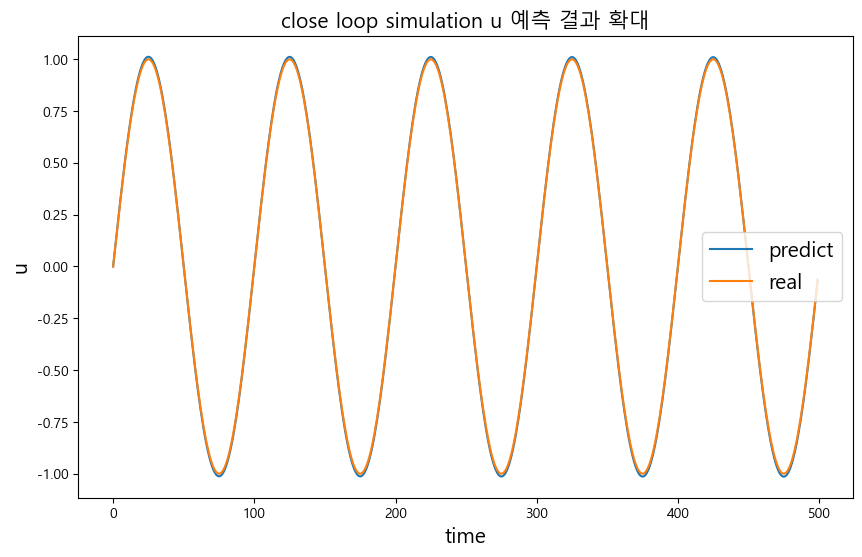

In [212]:
plt.figure(figsize=(10,6))
plt.plot(range(500),result_matrix_3[:,1][:500])
plt.plot(range(500), close_df.u[:500])
plt.title('close loop simulation u 예측 결과 확대', fontsize = 15)
plt.legend(['predict', 'real'], fontsize = 15)
plt.ylabel('u', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()